# Visium Experiment QC Report

In [279]:
### INPUT FILES ### ex: lib A1

#### SPACERANGER COUNT OUTPUTS
# path to unfiltered count matrix (whole slide)
unfiltered_cnts = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/raw_feature_bc_matrix/matrix.mtx"
# path to corresponding barcodes and features
uf_bc = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/raw_feature_bc_matrix/barcodes.tsv"
uf_genes = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/raw_feature_bc_matrix/features.tsv"

# path to filtered count matrix (under tissue)
filtered_cnts = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/filtered_feature_bc_matrix/matrix.mtx"
# path to corresponding barcodes and features
f_bc = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/filtered_feature_bc_matrix/barcodes.tsv"

f_genes = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/filtered_feature_bc_matrix/features.tsv"

# path to spatial barcoding/~tissue_positions.csv
sp = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/spatial/tissue_positions.csv"

# path to image file/~detected_tissue_image.jpg
img = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/spatial/detected_tissue_image.jpg"

# path to spaceranger web summary
web="/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/web_summary.html"

#### CUTADAP OUTPUTS
# path to cutadapt txt report
l1 = "/gpfs/commons/groups/vickovic_lab/crc/visium/FASTQ/2024-02-19_fastq/HYCKYBGXK/28T/cutadapt/395-28T-D1/summary_395_28T_D1_L001.txt"
l2 = "/gpfs/commons/groups/vickovic_lab/crc/visium/FASTQ/2024-02-19_fastq/HYCKYBGXK/28T/cutadapt/395-28T-D1/summary_395_28T_D1_L002.txt"
l2 = "/gpfs/commons/groups/vickovic_lab/crc/visium/FASTQ/2024-02-19_fastq/HYCKYBGXK/28T/cutadapt/395-28T-D1/summary_395_28T_D1_L003.txt"
l4 = "/gpfs/commons/groups/vickovic_lab/crc/visium/FASTQ/2024-02-19_fastq/HYCKYBGXK/28T/cutadapt/395-28T-D1/summary_395_28T_D1_L004.txt"

metrics = "/gpfs/commons/groups/vickovic_lab/crc/visium/spaceranger_output/2024-02-19_run/V11M22-395_JGCRC28T_D1/outs/metrics_summary.csv"

In [280]:
## Extract metrics from spaceranger output

import re

# Read the HTML file
with open(web, 'r', encoding='utf-8') as file:
    html_content = file.read()

# expression pattern to match the sample ID
pattern = r'"sample":{"id":"(.*?)",'
match = re.search(pattern, html_content)

if match:
    # extract
    sample_id = match.group(1)
#     print(f"```markdown\n## Library: {sample_id}\n```")
# else:
#     print("Sample ID not found in the HTML file.")
    
sample = sample_id

pattern2 = r',\["Transcriptome","(.*?)"\]'
match2 = re.search(pattern2, html_content)
transcript = match2.group(1)

pattern3 = r'"Slide Serial Number","(.*?)"'
match3 = re.search(pattern3, html_content)
slide = match3.group(1)

pattern4 = r',\["Total Genes Detected","(.*?)"\]'
match4 = re.search(pattern4, html_content)
total_genes_detected = match4.group(1)

pattern5 = r',\["Median Genes per Spot","(.*?)"\]'
match5 = re.search(pattern5, html_content)
med_genes = match5.group(1)

pattern6 = r',\["Valid Barcodes","(.*?)"\]'
match6 = re.search(pattern6, html_content)
valid_barcodes = match6.group(1)

pattern7 = r',\["Valid UMIs","(.*?)"\]'
match7 = re.search(pattern7, html_content)
umis = match7.group(1)

pattern8 = r'"Number of Reads","(\d{1,3}(?:,\d{3})*)"'
match8 = re.search(pattern8, html_content)
tot_reads = match8.group(1)

pattern9 = r',\["Mean Reads per Spot","(.*?)"\]'
match9 = re.search(pattern9, html_content)
av_reads_spot_all = match9.group(1)

pattern10 = r',\["Mean Reads Under Tissue per Spot","(.*?)"\]'
match10 = re.search(pattern10, html_content)
av_reads_spot_tissue = match10.group(1)

pattern11 = r'"Fraction Reads in Spots Under Tissue","(\d+\.\d+%)'
match11 = re.search(pattern11, html_content)
fraction_reads_tissue = match11.group(1)

pattern12 = r'"Reads Mapped to Genome","(\d+\.\d+%)'
match12 = re.search(pattern12, html_content)
reads_mapped = match12.group(1)

pattern13 = r',\["Reads Mapped Confidently to Genome","(.*?)"\]'
match13 = re.search(pattern13, html_content)
reads_confidently_mapped = match13.group(1)

pattern14 = r',\["Reads Mapped Confidently to Intronic Regions","(.*?)"\]'
match14 = re.search(pattern14, html_content)
reads_confidently_mapped_introns = match14.group(1)

pattern15 = r',\["Reads Mapped Confidently to Transcriptome","(.*?)"\]'
match15 = re.search(pattern15, html_content)
reads_confidently_mapped_transcriptome = match15.group(1)

In [281]:
from IPython.display import Markdown as md
md (f"# Library: {sample_id}")

# Library: V11M22-395_JGCRC28T_D1

## Metrics from spaceranger count output

In [282]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(metrics)
df.set_index('Sample ID', inplace=True)
df = df.round(4)
df = df.style.format({'Fraction Reads in Spots Under Tissue': '{:.2%}', 'Reads Mapped Antisense to Gene': '{:.2%}',
                      'Reads Mapped Confidently to Transcriptome': '{:.2%}','Reads Mapped Confidently to Exonic Regions': '{:.2%}','Reads Mapped Antisense to Gene': '{:.2%}',
                      'Reads Mapped Confidently to Intronic Regions': '{:.2%}','Reads Mapped Confidently to Intergenic Regions': '{:.2%}',
                      'Reads Mapped Confidently to Genome': '{:.2%}','Reads Mapped to Genome': '{:.2%}',
                      'Q30 Bases in UMI': '{:.2%}','Q30 Bases in RNA Read': '{:.2%}',
                      'Q30 Bases in Barcode': '{:.2%}','Sequencing Saturation': '{:.2%}',
                      'Valid UMIs': '{:.2%}','Valid Barcodes': '{:.2%}','Fraction of Spots Under Tissue': '{:.2%}',
                      'Mean Reads per Spot':'{:.2f}','Mean Reads Under Tissue per Spot':'{:.2f}','Median Genes per Spot':'{:.2f}', 
                      'Median UMI Counts per Spot':'{:.2f}'})
df

## Inside vs. Outside Tissue

In [283]:
### define dataframe for outside tissue data

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import mmread
import numpy as np

uf_matrix = mmread(unfiltered_cnts)
uf_matrix_array = np.array(uf_matrix.toarray())
uf_spot_gene = pd.DataFrame(uf_matrix_array)
uf_col = pd.read_csv(uf_bc,sep='\t', header=None).values
uf_col = uf_col.flatten()
uf_spot_gene.columns = uf_col

coords = pd.read_csv(sp)

outside_tissue = coords[coords["in_tissue"] == 0]
outside_spots_indexes = outside_tissue["barcode"]
#outside_spots = uf_spot_gene[outside_spots_indexes] yields error if not perfect match
outside_spots = uf_spot_gene[uf_spot_gene.columns[uf_spot_gene.columns.isin(outside_spots_indexes)]]
outside_counts_per_spot = np.sum(outside_spots, axis=0)
outside_genes_per_spot = np.sum(outside_spots > 0, axis=0)

In [284]:
## Determine max value for spatial heatmap colorscale-UNFILTERED

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import mmread
import numpy as np

f_matrix = mmread(filtered_cnts)
f_matrix_array = np.array(f_matrix.toarray())
f_spot_gene = pd.DataFrame(f_matrix_array)
f_col = pd.read_csv(f_bc,sep='\t', header=None).values
f_col = f_col.flatten()
f_spot_gene.columns = f_col

# Calculate total counts per barcode
f_total_counts_per_spot = f_spot_gene.sum(axis=0)

# Sort barcodes based on total counts
f_sorted_barcodes = f_total_counts_per_spot.sort_values(ascending=False)

f_percentile_95 = np.percentile(f_total_counts_per_spot, 95)

### genes 

### genes 
f_genes_per_spot = np.sum(f_matrix_array > 0, axis=0)
f_genes_percentile_95 = np.percentile(f_genes_per_spot, 95)


In [285]:
## Determine max value for spatial heatmap colorscale-FILTERED

uf_matrix = mmread(unfiltered_cnts)
uf_matrix_array = np.array(uf_matrix.toarray())
uf_spot_gene = pd.DataFrame(uf_matrix_array)
uf_col = pd.read_csv(uf_bc,sep='\t', header=None).values
uf_col = uf_col.flatten()
uf_spot_gene.columns = uf_col

# Calculate total counts per barcode
uf_total_counts_per_spot = uf_spot_gene.sum(axis=0)

outside_counts_per_spot = np.sum(outside_spots, axis=0)

# Sort barcodes based on total counts
uf_sorted_barcodes = uf_total_counts_per_spot.sort_values(ascending=False)
uf_percentile_95 = np.percentile(uf_total_counts_per_spot, 95)

sorted_outside_counts_per_spot = outside_counts_per_spot.sort_values(ascending=False)
outside_counts_per_spot_p95 = np.percentile(outside_counts_per_spot, 95)

### genes 
uf_genes_per_spot = np.sum(uf_matrix_array > 0, axis=0)
uf_genes_percentile_95 = np.percentile(uf_genes_per_spot, 95)

outside_genes_per_spot = np.sum(outside_spots > 0, axis=0)
outside_genes_per_spot_p95 = np.percentile(outside_genes_per_spot, 95)



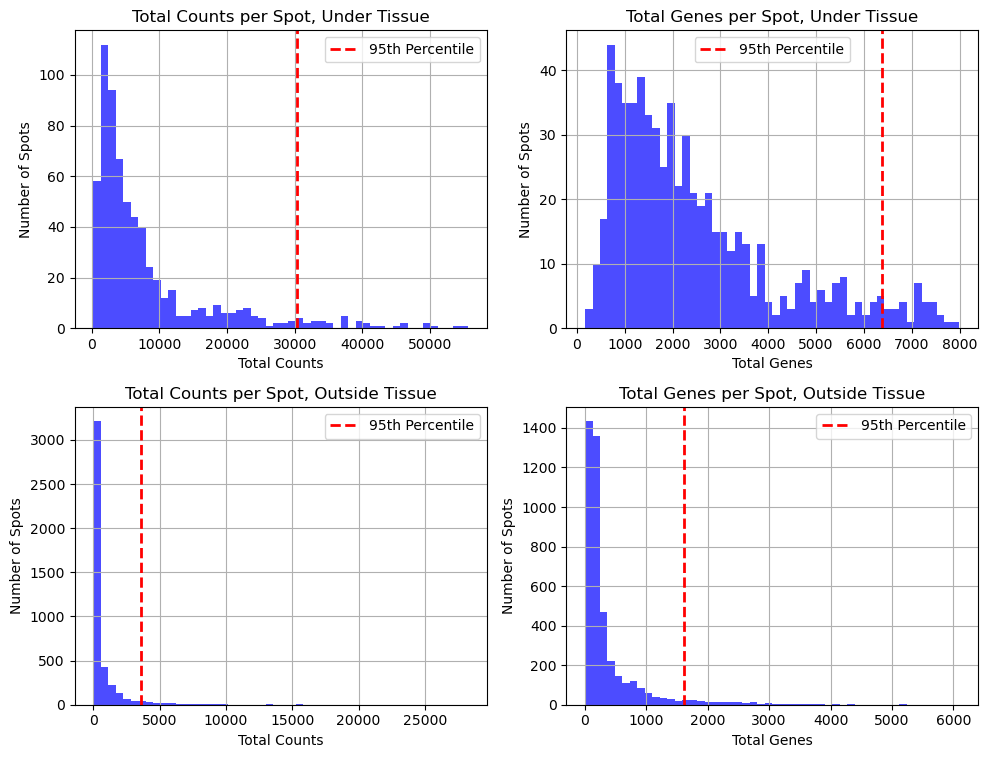

In [286]:
# Plot histograms in a 2x2 grid for counts + genes

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import mmread
import numpy as np

def plot_histogram(ax, data, title, xlabel, ylabel, percentile_line_color='red'):
    # Plot histogram
    ax.hist(data, bins=50, color='blue', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.axvline(x=np.percentile(data, 95), color=percentile_line_color, linestyle='dashed', linewidth=2, label='95th Percentile')
    ax.legend()
    ax.grid(True)

# Read filtered data
f_matrix = mmread(filtered_cnts)
f_matrix_array = np.array(f_matrix.toarray())
f_spot_gene = pd.DataFrame(f_matrix_array)
f_col = pd.read_csv(f_bc, sep='\t', header=None).values.flatten()
f_spot_gene.columns = f_col

# Plot histograms in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1
plot_histogram(axes[0, 0], f_total_counts_per_spot, 'Total Counts per Spot, Under Tissue', 'Total Counts', 'Number of Spots')

# Plot 2
plot_histogram(axes[0, 1], f_genes_per_spot, 'Total Genes per Spot, Under Tissue', 'Total Genes', 'Number of Spots')

# Read unfiltered data
uf_matrix = mmread(unfiltered_cnts)
uf_matrix_array = np.array(uf_matrix.toarray())
uf_spot_gene = pd.DataFrame(uf_matrix_array)
uf_col = pd.read_csv(uf_bc, sep='\t', header=None).values.flatten()
uf_spot_gene.columns = uf_col

# Plot 3
plot_histogram(axes[1, 0], outside_counts_per_spot, 'Total Counts per Spot, Outside Tissue', 'Total Counts', 'Number of Spots')

# Plot 4
plot_histogram(axes[1, 1], outside_genes_per_spot, 'Total Genes per Spot, Outside Tissue', 'Total Genes', 'Number of Spots')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

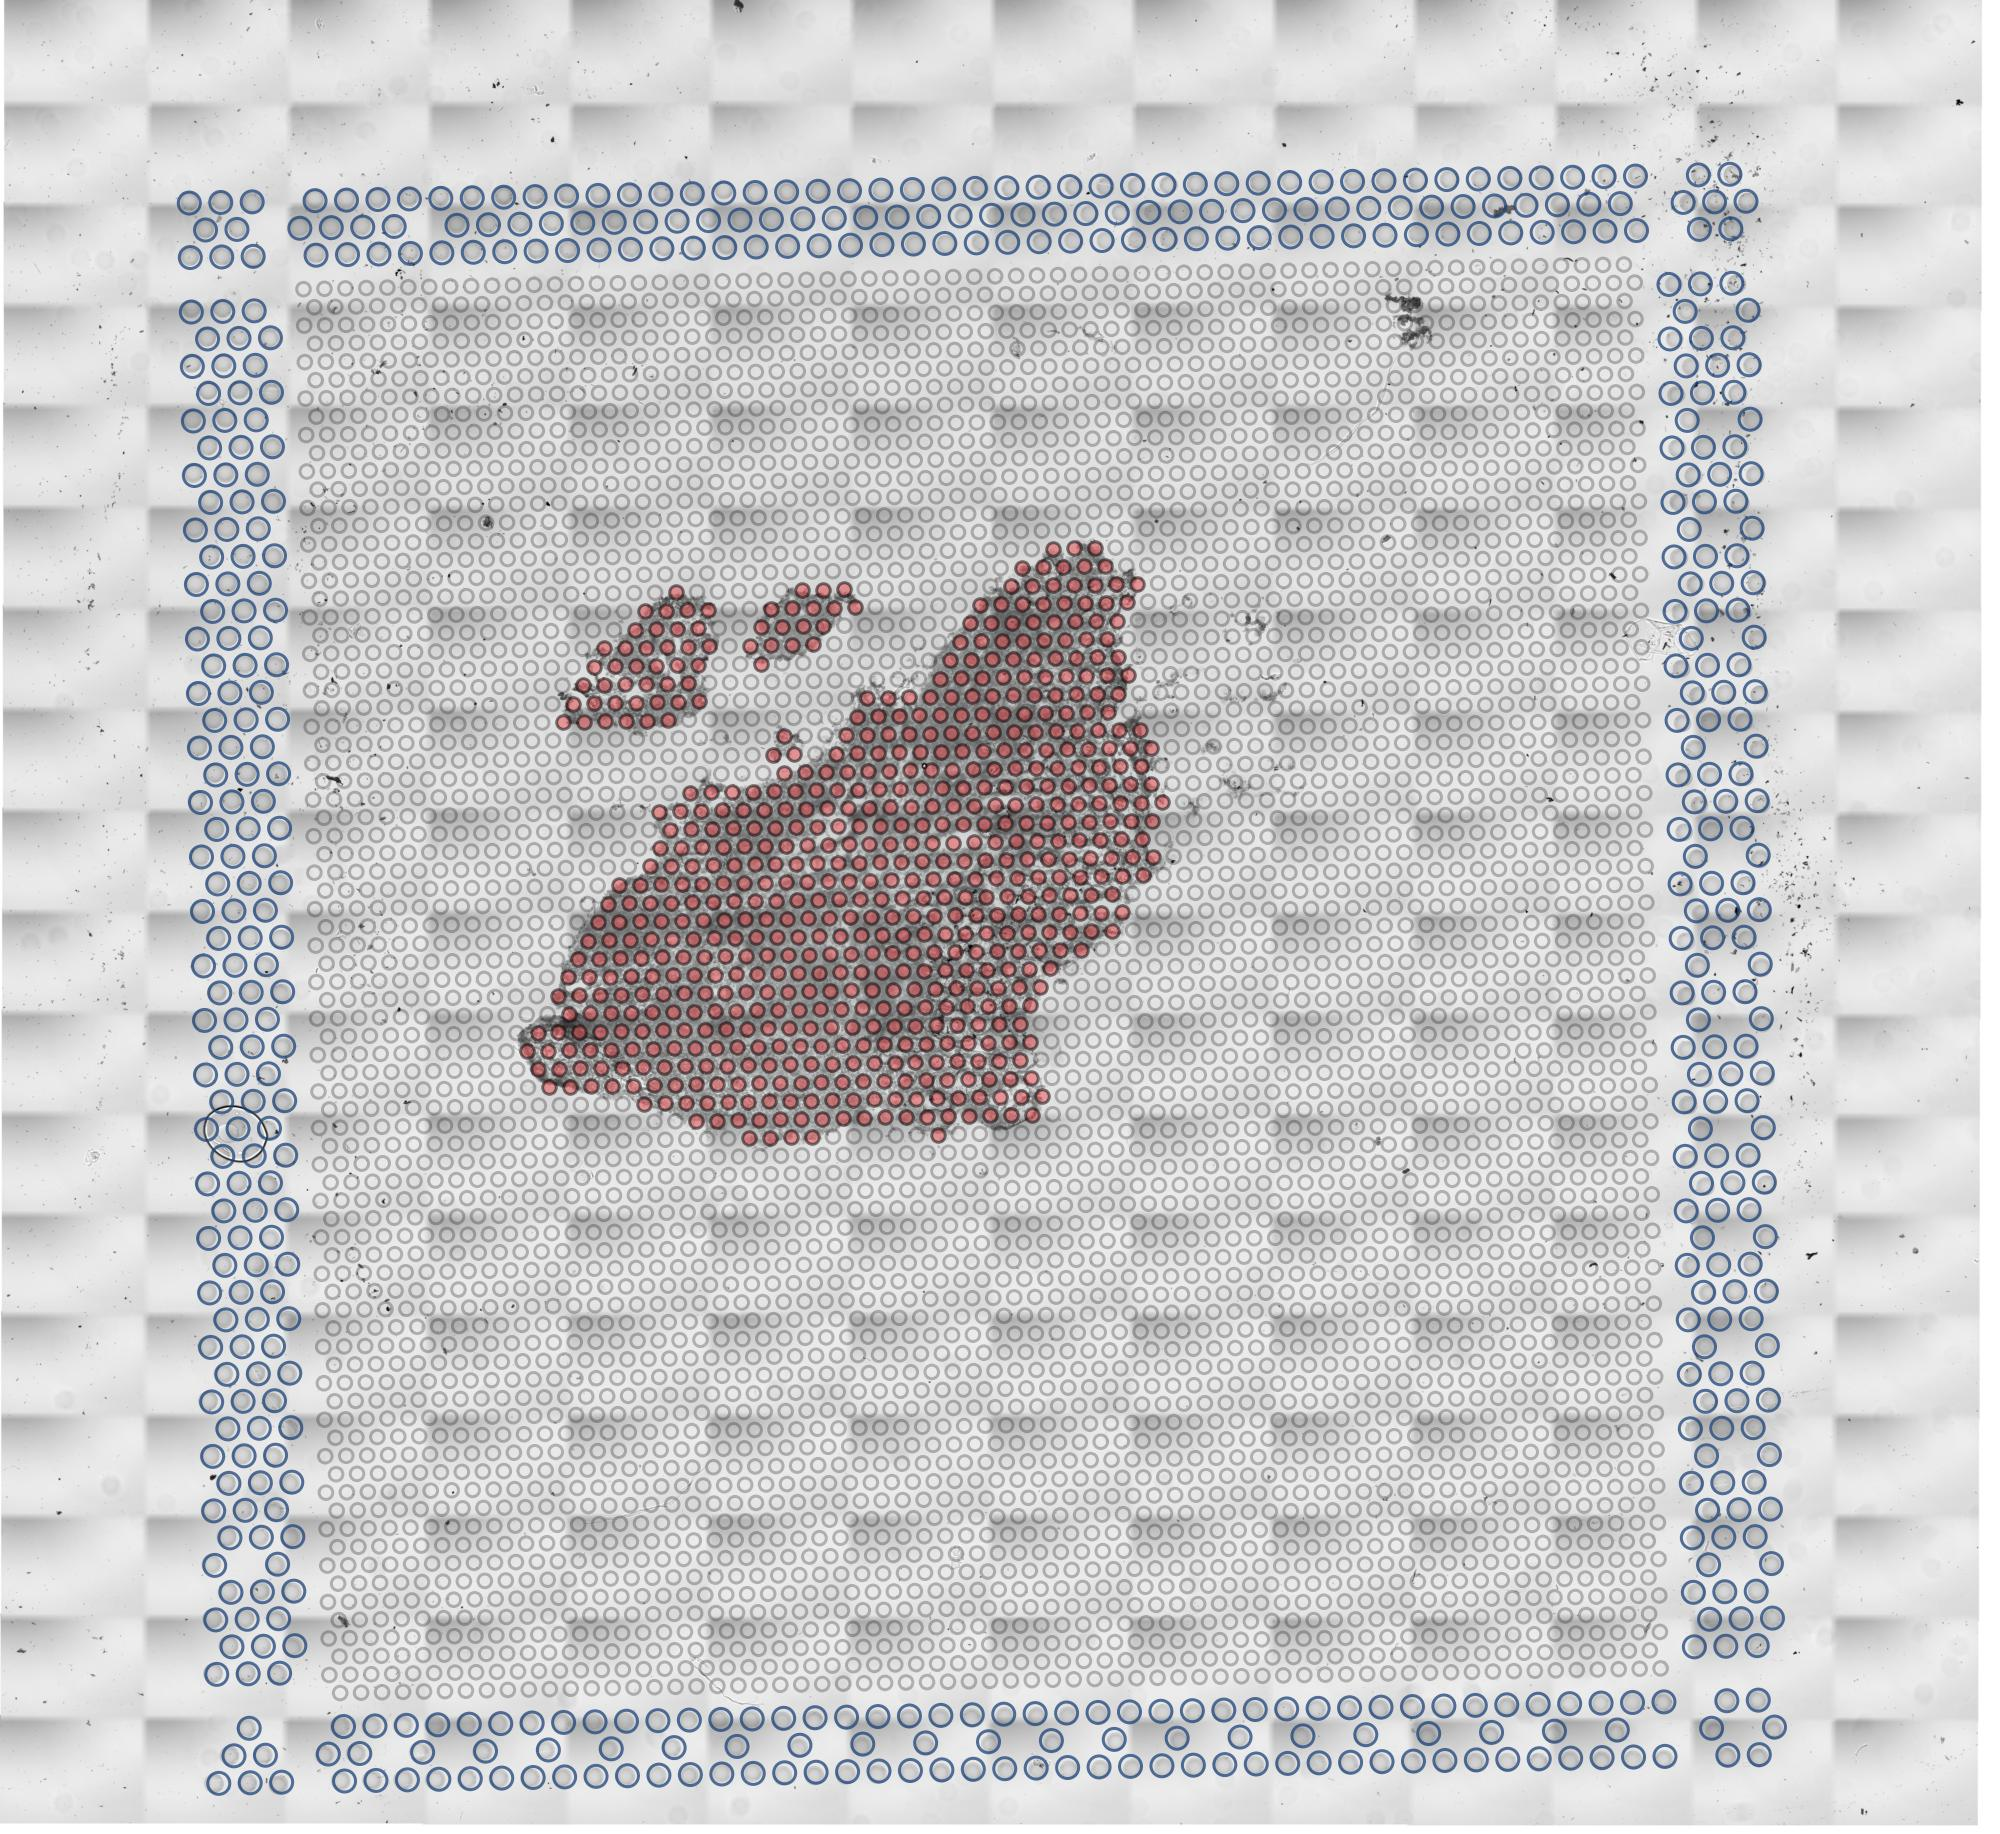

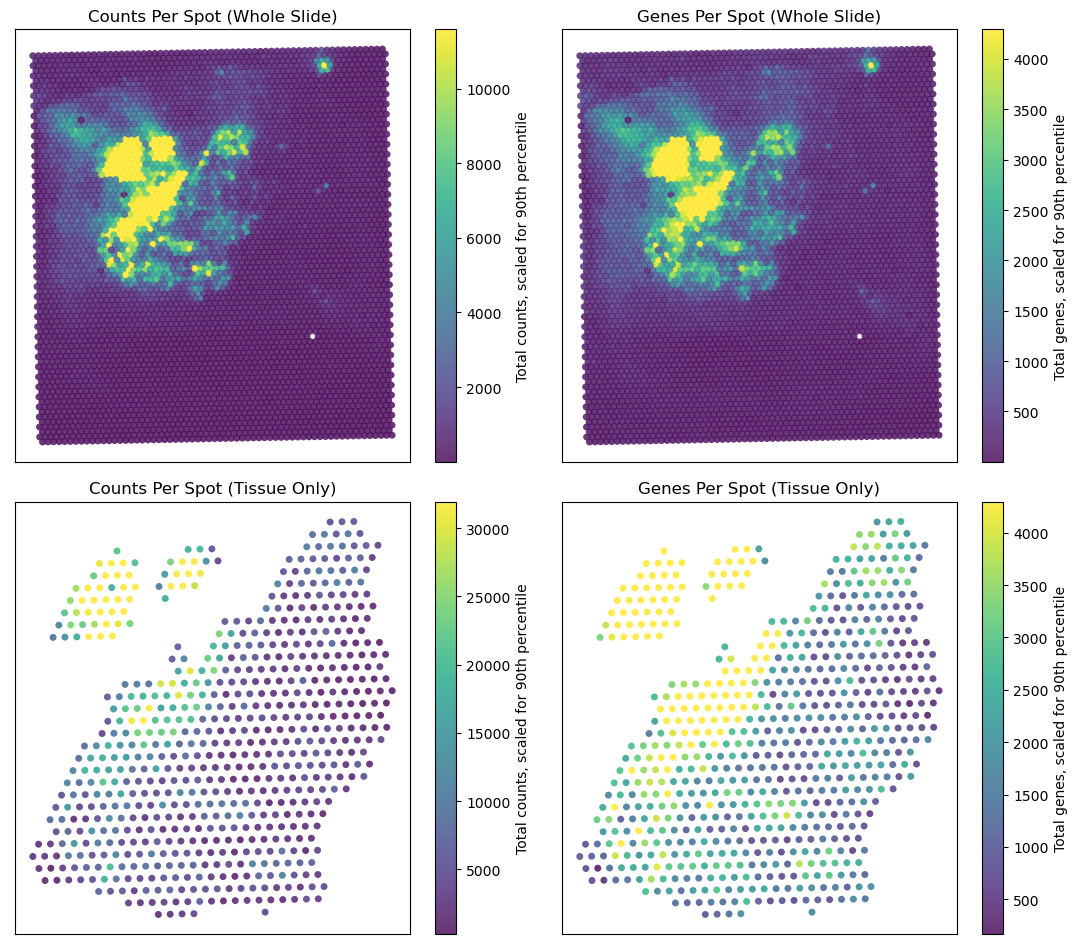

In [287]:
from IPython.display import display, Image
import matplotlib.pyplot as plt

# Display image
display(Image(filename=img, width=500))

## WHOLE SLIDE

import gzip
import numpy as np
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt

uf_matrix = mmread(unfiltered_cnts)
uf_matrix_array = np.array(uf_matrix.toarray())
uf_spot_gene = pd.DataFrame(uf_matrix_array)
uf_col = pd.read_csv(uf_bc,sep='\t', header=None).values
uf_col = uf_col.flatten()
uf_spot_gene.columns = uf_col

# Coordinates
coords = pd.read_csv(sp)
coord_cols = uf_spot_gene.columns
x = []
y = []
for c in coord_cols:
    result = coords[coords['barcode'] == c]
    x.append(result['pxl_row_in_fullres'].values[0])
    y.append(result['pxl_col_in_fullres'].values[0])

counts_per_spot = np.sum(uf_matrix_array, axis=0)
genes_per_spot = np.sum(uf_matrix_array > 0, axis=0)

x = np.array(x)
y = np.array(y)

uf_subset_90 = counts_per_spot[counts_per_spot < np.quantile(counts_per_spot, 0.95)]
uf_subset_90_max = uf_subset_90.max()
uf_subset_90_max = uf_subset_90_max + 0.5*(uf_subset_90_max)

uf_genesubset_90 = genes_per_spot[genes_per_spot < np.quantile(genes_per_spot, 0.95)]
uf_genesubset_90_max = uf_genesubset_90.max()
uf_genesubset_90_max = uf_genesubset_90_max + 0.5*(uf_genesubset_90_max)

# TISSUE ONLY

f_matrix = mmread(filtered_cnts)
f_matrix_array = np.array(f_matrix.toarray())
f_spot_gene = pd.DataFrame(f_matrix_array)
f_col = pd.read_csv(f_bc,sep='\t', header=None).values
f_col = f_col.flatten()
f_spot_gene.columns = f_col

# Coordinates
coords = pd.read_csv(sp)
f_coord_cols = f_spot_gene.columns
z = []
w = []
e = 0.0000000000000000001
for d in f_coord_cols:
    result = coords[coords['barcode'] == d]
    z.append(result['pxl_row_in_fullres'].values[0])
    w.append(result['pxl_col_in_fullres'].values[0])

f_counts_per_spot = np.sum(f_matrix_array, axis=0)
f_genes_per_spot = np.sum(f_matrix_array > 0, axis=0)

f_subset_90 = f_total_counts_per_spot[f_total_counts_per_spot < np.quantile(f_total_counts_per_spot, 0.9)]
f_subset_90_max = f_subset_90.max()
f_subset_90_max = f_subset_90_max + 0.5*f_subset_90_max

f_genesubset_90 = genes_per_spot[genes_per_spot < np.quantile(genes_per_spot, 0.95)]
f_genesubset_90_max = f_genesubset_90.max()
f_genesubset_90_max = f_genesubset_90_max + 0.5*(f_genesubset_90_max)

z = np.array(z)
w = np.array(w)

# Create subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 10))

# Plot for Whole Slide - Counts per Spot
sc1 = axes[0, 0].scatter(y / 2, x, c=counts_per_spot, cmap='viridis', alpha=0.8, s=25, edgecolors='none', vmax=uf_subset_90_max)
axes[0, 0].set_title('Counts Per Spot (Whole Slide)')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
axes[0, 0].invert_yaxis()
cbar1 = fig.colorbar(sc1, ax=axes[0, 0], orientation='vertical',label='Total counts, scaled for 90th percentile')

# Plot for Whole Slide - Genes per Spot
sc2 = axes[0, 1].scatter(y / 2, x, c=genes_per_spot, cmap='viridis', alpha=0.8, s=25, edgecolors='none', vmax=uf_genesubset_90_max)
axes[0, 1].set_title('Genes Per Spot (Whole Slide)')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
axes[0, 1].invert_yaxis()
cbar2 = fig.colorbar(sc2, ax=axes[0, 1], orientation='vertical',label='Total genes, scaled for 90th percentile')

# Plot for Tissue Only - Counts per Spot
sc3 = axes[1, 0].scatter(w / 2, z, c=f_counts_per_spot, cmap='viridis', alpha=0.8, s=25, edgecolors='none', vmax=f_subset_90_max)
axes[1, 0].set_title('Counts Per Spot (Tissue Only)')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
axes[1, 0].invert_yaxis()
cbar3 = fig.colorbar(sc3, ax=axes[1, 0], orientation='vertical',label='Total counts, scaled for 90th percentile')

# Plot for Tissue Only - Genes per Spot
sc4 = axes[1, 1].scatter(w / 2, z, c=f_genes_per_spot, cmap='viridis', alpha=0.8, s=25, edgecolors='none', vmax=f_genesubset_90_max)
axes[1, 1].set_title('Genes Per Spot (Tissue Only)')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
axes[1, 1].invert_yaxis()
cbar4 = fig.colorbar(sc4, ax=axes[1, 1], orientation='vertical',label='Total genes, scaled for 90th percentile')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [288]:
outside_tissue = coords[coords["in_tissue"] == 0]
outside_spots_indexes = outside_tissue["barcode"]
#outside_spots = uf_spot_gene[outside_spots_indexes] yields error if not perfect match
outside_spots = uf_spot_gene[uf_spot_gene.columns[uf_spot_gene.columns.isin(outside_spots_indexes)]]
outside_counts_per_spot = np.sum(outside_spots, axis=0)
outside_genes_per_spot = np.sum(outside_spots > 0, axis=0)

In [289]:
#### Counts inside vs. outside tissue

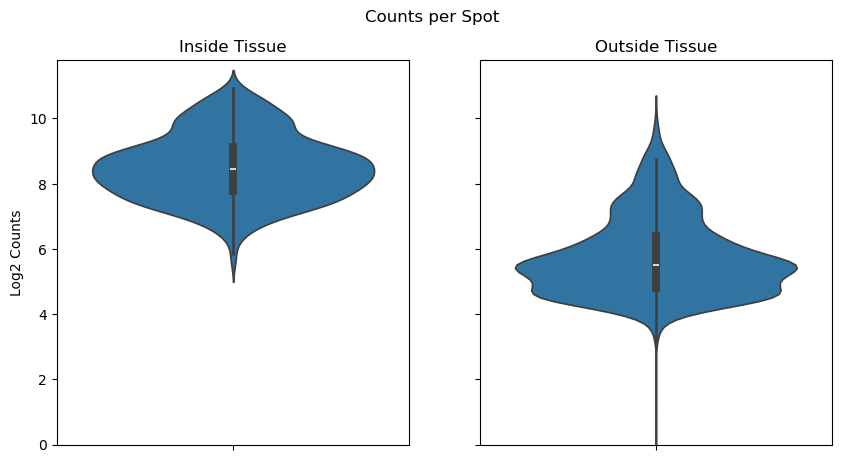

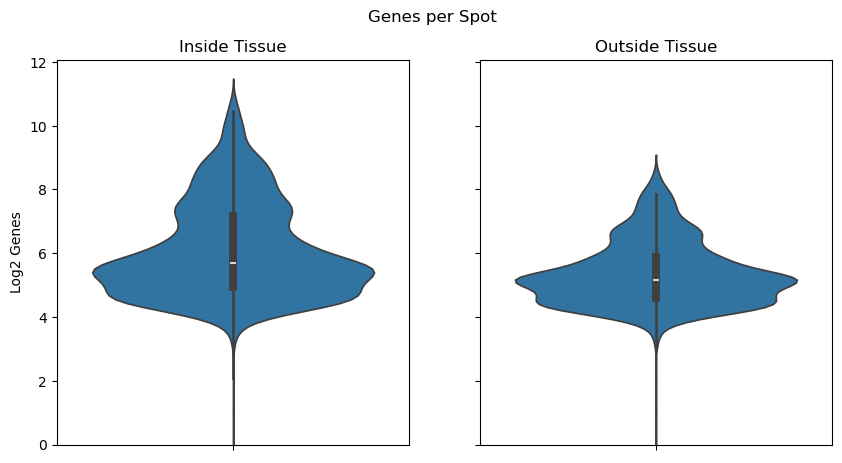

In [290]:
# VIOLIN PLOTS 
import seaborn as sns

e=0.000000000000001
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
sns.violinplot(data=np.log(f_counts_per_spot+e), ax=ax1)
ax1.set_title("Inside Tissue")
ax1.set_ylabel('Log2 Counts') 
ax1.set_ylim(bottom=0)
sns.violinplot(data=np.log(outside_counts_per_spot+e), ax=ax2)
ax2.set_title("Outside Tissue")
ax2.set_ylim(bottom=0)
fig.suptitle('Counts per Spot')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
sns.violinplot(data=np.log(counts_per_spot+e), ax=ax1)
ax1.set_title("Inside Tissue")
ax1.set_ylabel('Log2 Genes') 
ax1.set_ylim(bottom=0)
sns.violinplot(data=np.log(outside_genes_per_spot+e), ax=ax2)
ax2.set_title("Outside Tissue")
ax2.set_ylim(bottom=0)
fig.suptitle('Genes per Spot')
plt.show()

## Visualization of gene density: number of transcripts, number of spots per gene

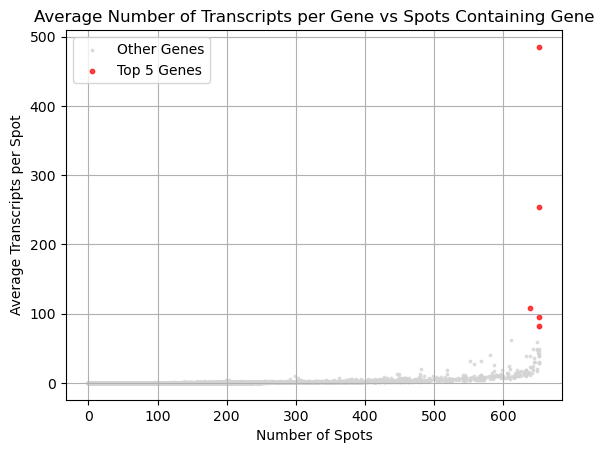

In [291]:
### scatterplot showing where the top 5 expressed genes fall 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the number of samples containing each gene
samples_containing_gene = (f_spot_gene > 0).sum(axis=1)

# Calculate the av counts for each gene
av_counts_per_gene = f_spot_gene.mean(axis=1)


all_gene_names = pd.read_csv(f_genes, sep='\t', header=None)[1]
f_spot_gene.index = all_gene_names

# Determine the top 5 expressed genes
indices = f_matrix_array.sum(axis=1).argsort()[-5:]
top_5_genes = pd.read_csv(f_genes, sep='\t', header=None)[1][indices]
# Create a mask for the top 5 genes
top_5_mask = f_spot_gene.index.isin(top_5_genes)

# Create a scatter plot
plt.scatter(samples_containing_gene[~top_5_mask], av_counts_per_gene[~top_5_mask], color = 'lightgrey',alpha=0.7, s=3, label='Other Genes')
plt.scatter(samples_containing_gene[top_5_mask], av_counts_per_gene[top_5_mask], color='red', alpha=0.7, s=10, label='Top 5 Genes')
plt.xlabel('Number of Spots')
plt.ylabel('Average Transcripts per Spot')
plt.title('Average Number of Transcripts per Gene vs Spots Containing Gene')
plt.legend()
plt.grid(True)
plt.show()

In [292]:
## top 5 genes sanity check
all_gene_names = pd.read_csv(f_genes, sep='\t', header=None)[1]
f_spot_gene.index = all_gene_names

# Determine the top 5 expressed genes
indices = f_matrix_array.sum(axis=1).argsort()[-5:]
top_5_genes = pd.read_csv(f_genes, sep='\t', header=None)[1][indices]

## Spatial distribution of top 5 expressed genes

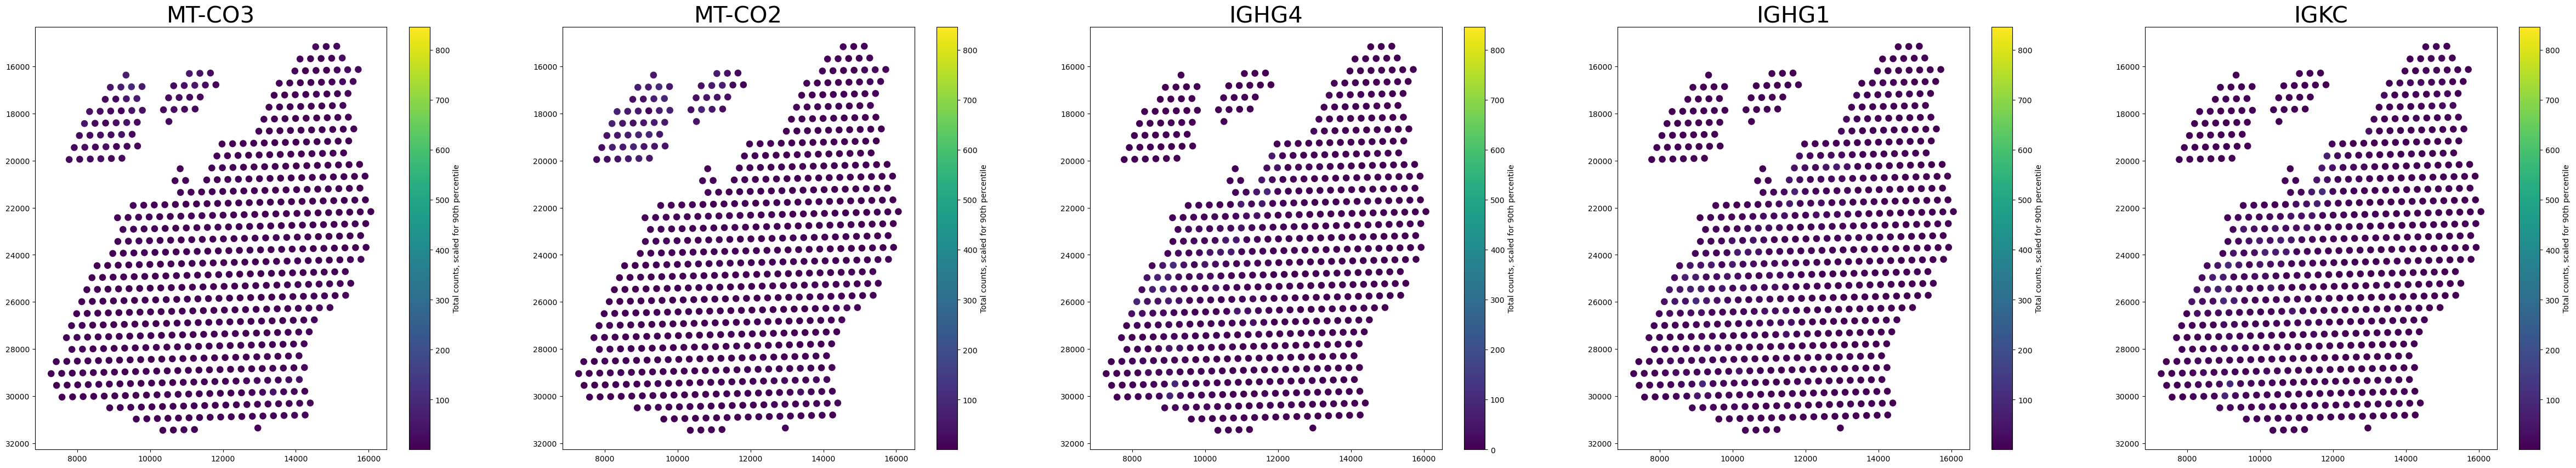

In [293]:
## Plot spatial heatmap of top 5 expressed genes

indices = f_matrix_array.sum(axis=1).argsort()[-5:]

f_matrix_array.sum(axis=1)[indices]

top_5_95 = f_matrix_array[indices][f_matrix_array[indices] < np.quantile(f_matrix_array[indices], 0.90)]
top_5_95_max = top_5_95.max()
top_5_95_max = top_5_95_max + 0.5*(top_5_95_max)

gene_names = pd.read_csv(f_genes, sep='\t', header=None)[1][indices]

fig, ax = plt.subplots(1, 5, figsize = (60,10))
e = 0.0000000000001
for i in range(5):
    sc = ax[i].scatter(w / 2, z, c = (f_matrix_array[indices[i],:] / max(f_matrix_array[indices[i],:])) * 100, s = 65,vmax=top_5_95_max)
    ax[i].invert_yaxis()
    ax[i].set_title(gene_names[indices[i]], fontsize=30)
    fig.colorbar(sc, ax=ax[i],label='Total counts, scaled for 90th percentile') # Add color bar with label


In [294]:
### Cell types
counts_matrix = f_spot_gene
counts_matrix.index = all_gene_names
counts_matrix.index.name = None
#
limpho_markers = ['CD3E',"CD3D","CD4","CD8A","CD8B","IL7R","TCF7"]
limpho_subset = counts_matrix[counts_matrix.index.isin(limpho_markers)]
#
colon_diff_markers = ['KRT20','TSPAN1','CEACAM5']
colon_diff_subset = counts_matrix[counts_matrix.index.isin(colon_diff_markers)]
#
goblet_sec_markers = ['MUC1', 'ZG16', 'ATOH1', 'FCGBP', 'TFF3', 'SERPINA1', 'SPINK4', 'SPINK1']
goblet_sec_subset = counts_matrix[counts_matrix.index.isin(goblet_sec_markers)]
#
entero_markers = ['BEST4', 'OTOP2', 'FABP1', 'CA2', 'SLC26A3', 'CA1', 'SLC26A2']
entero_subset = counts_matrix[counts_matrix.index.isin(entero_markers)]
#
isc_markers = ['ADH1C', 'LEFTY1', 'OLFM4', 'RARRES2', 'LGR5', 'ASCL2', 'SMOC2', 'MEX3A']
isc_subset = counts_matrix[counts_matrix.index.isin(isc_markers)]
#
neuroendocrine_markers = ['NEUROD1', 'CHGA', 'SCGN']
neuroendocrine_subset = counts_matrix[counts_matrix.index.isin(neuroendocrine_markers)]
# 
tuft_markers = ['TRPM5', 'LRMP', 'SH2D6']
tuft_subset = counts_matrix[counts_matrix.index.isin(tuft_markers)]
# 
proliferative_markers = ['MKI67']
proliferative_subset = counts_matrix[counts_matrix.index.isin(proliferative_markers)]
# CD8PosT genes
cd8post_genes = ['TOX', 'LAG3', 'TIGIT', 'IFNG', 'GZMB', 'GZMH']
cd8post_subset = counts_matrix[counts_matrix.index.isin(cd8post_genes)]
# CD4PosT genes
cd4post_genes = ['IL17A', 'CTL4A', 'SOX4']
cd4post_subset = counts_matrix[counts_matrix.index.isin(cd4post_genes)]
# GDlikeT genes
gdlike_genes = ['TRGC1', 'TRGC2']
gdlike_subset = counts_matrix[counts_matrix.index.isin(gdlike_genes)]
# Bcells genes
bcells_genes = ['CD79A', 'CD74', 'CD19', 'MS4A1', 'TCL1A', 'IGHD', 'IGHM']
bcells_subset = counts_matrix[counts_matrix.index.isin(bcells_genes)]
# PlasmaCells genes
plasma_cells_genes = ['IGHA1', 'JCHAIN', 'MZB1', 'IGHG1', 'IGHG3', 'IGHG4']
plasma_cells_subset = counts_matrix[counts_matrix.index.isin(plasma_cells_genes)]
# Mast genes
mast_genes = ['TPSAB1', 'CPA3', 'KIT']
mast_subset = counts_matrix[counts_matrix.index.isin(mast_genes)]
# Mono genes
mono_genes = ['FCN1']
mono_subset = counts_matrix[counts_matrix.index.isin(mono_genes)]
# Macro genes
macro_genes = ['VCAN', 'CD300E', 'S100A12', 'CD163', 'APOC1', 'LIPA', 'C1QA', 'CSF1R']
macro_subset = counts_matrix[counts_matrix.index.isin(macro_genes)]
# DCs genes
dcs_genes = ['CLEC9A', 'CLEC10A', 'CLEC4C']
dcs_subset = counts_matrix[counts_matrix.index.isin(dcs_genes)]
# Granulo genes
granulo_genes = ['FCGR3B', 'HCAR2', 'GPR109B', 'CSF3R']
granulo_subset = counts_matrix[counts_matrix.index.isin(granulo_genes)]
# Fibrostroma genes
fibrostroma_genes = ['ACTA2', 'LUM', 'TAGLN', 'VIM', 'COL3A1', 'COL6A2', 'COL1A2', 'FN1', 'CD81', 'MYH9']
fibrostroma_subset = counts_matrix[counts_matrix.index.isin(fibrostroma_genes)]
# Panepithelial genes
panepithelial_genes = ['CDH1', 'EPCAM', 'KRT8', 'KRT18', 'EZR']
panepithelial_subset = counts_matrix[counts_matrix.index.isin(panepithelial_genes)]

In [295]:
# Create a mask for the limpho genes
limpho_mask = counts_matrix.index.isin(limpho_markers)
colon_diff_mask = counts_matrix.index.isin(colon_diff_markers)
goblet_sec_mask = counts_matrix.index.isin(goblet_sec_markers)
entero_mask = counts_matrix.index.isin(entero_markers)
isc_mask = counts_matrix.index.isin(isc_markers)
neuroendocrine_mask = counts_matrix.index.isin(neuroendocrine_markers)
tuft_mask = counts_matrix.index.isin(tuft_markers)
proliferative_mask = counts_matrix.index.isin(proliferative_markers)
cd8post_mask = counts_matrix.index.isin(cd8post_genes)
cd4post_mask = counts_matrix.index.isin(cd4post_genes)
gdlike_mask = counts_matrix.index.isin(gdlike_genes)
bcells_mask = counts_matrix.index.isin(bcells_genes)
plasma_cells_mask = counts_matrix.index.isin(plasma_cells_genes)
mast_mask = counts_matrix.index.isin(mast_genes)
mono_mask = counts_matrix.index.isin(mono_genes)
macro_mask = counts_matrix.index.isin(macro_genes)
dcs_mask = counts_matrix.index.isin(dcs_genes)
granulo_mask = counts_matrix.index.isin(granulo_genes)
fibrostroma_mask = counts_matrix.index.isin(fibrostroma_genes)
panepithelial_mask = counts_matrix.index.isin(panepithelial_genes)

## Cell type-specific average expression per spot

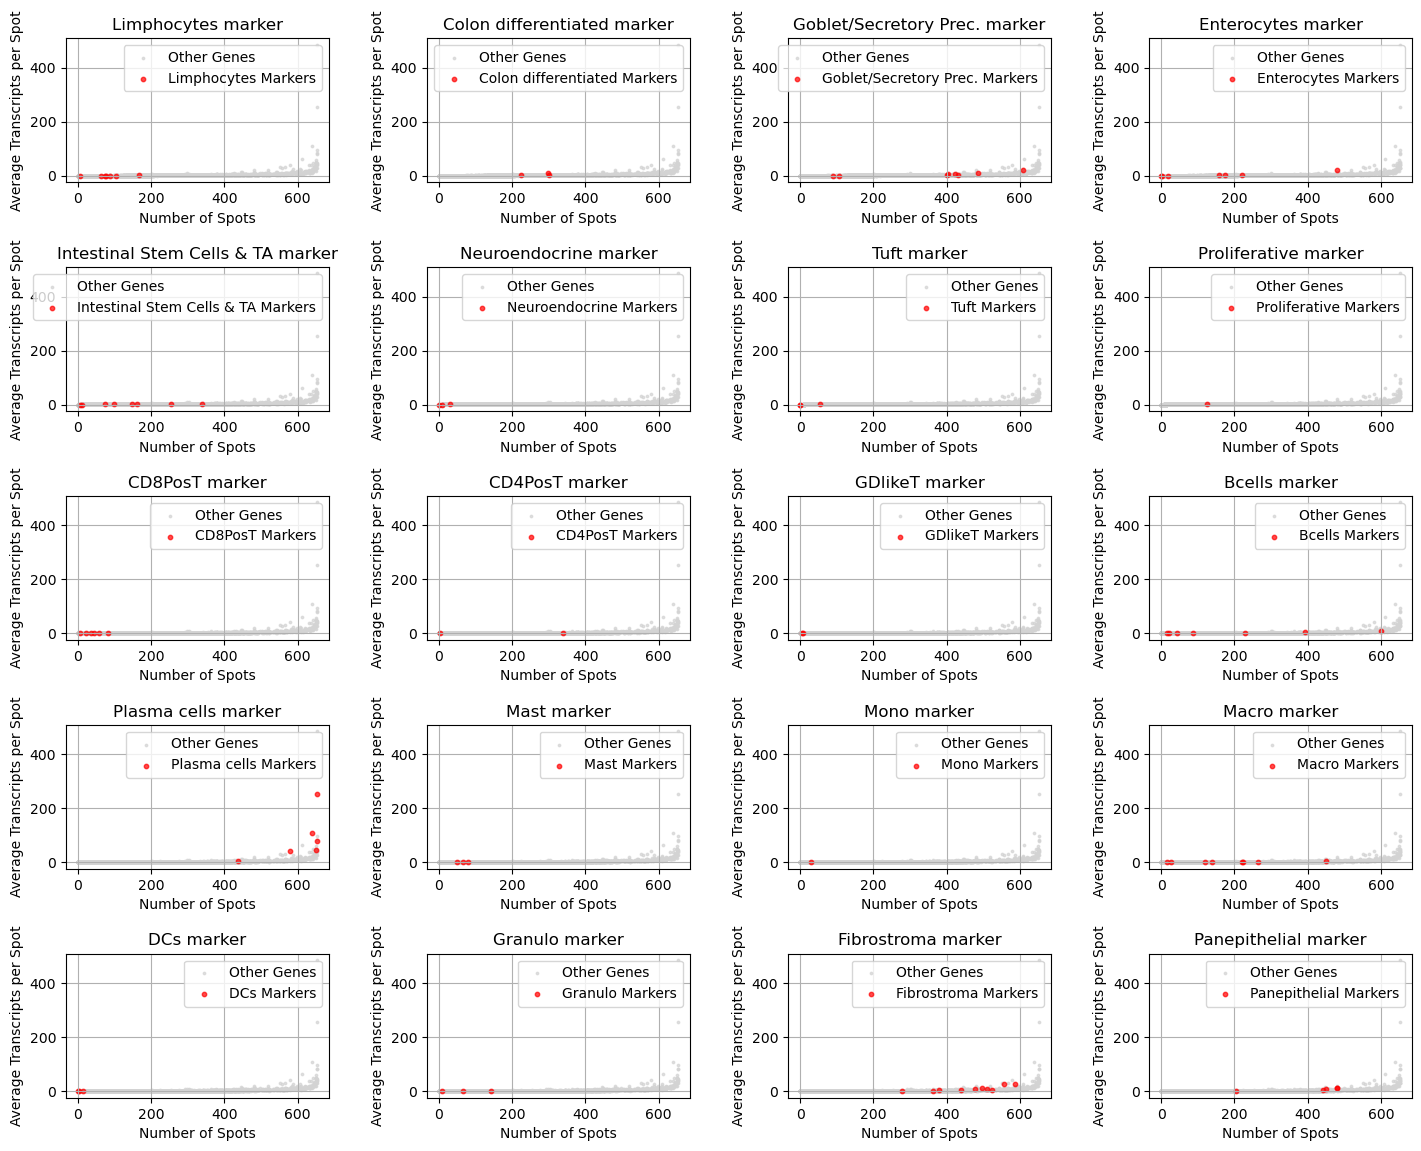

In [296]:
import matplotlib.pyplot as plt

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.tight_layout(pad=4.0)

# Create masks and marker types (as previously shown)

# List of masks and corresponding marker types
masks = [limpho_mask, colon_diff_mask, goblet_sec_mask, entero_mask, isc_mask, neuroendocrine_mask, tuft_mask,
         proliferative_mask, cd8post_mask, cd4post_mask, gdlike_mask, bcells_mask, plasma_cells_mask, mast_mask,
         mono_mask, macro_mask, dcs_mask, granulo_mask, fibrostroma_mask, panepithelial_mask]

cell_types = ['Limphocytes','Colon differentiated', 'Goblet/Secretory Prec.', 'Enterocytes', 'Intestinal Stem Cells & TA', 'Neuroendocrine', 'Tuft', 'Proliferative', 'CD8PosT', 'CD4PosT', 'GDlikeT', 'Bcells', 'Plasma cells', 'Mast', 'Mono', 'Macro', 'DCs', 'Granulo', 'Fibrostroma', 'Panepithelial']

# Iterate over masks and corresponding colors
for i, (mask, cell) in enumerate(zip(masks, cell_types)):
    row = i // 4
    col = i % 4

    # Scatter plot for each marker type
    axes[row, col].scatter(samples_containing_gene[~mask], av_counts_per_gene[~mask], color='lightgrey', alpha=0.7, s=3, label='Other Genes')
    axes[row, col].scatter(samples_containing_gene[mask], av_counts_per_gene[mask], color='red', alpha=0.7, s=10, label=f'{cell} Markers')
    axes[row, col].set_xlabel('Number of Spots')
    axes[row, col].set_ylabel('Average Transcripts per Spot')
    axes[row, col].set_title(f'{cell} marker')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Show the plot
plt.show()

## Cell type-specific total expression per spot

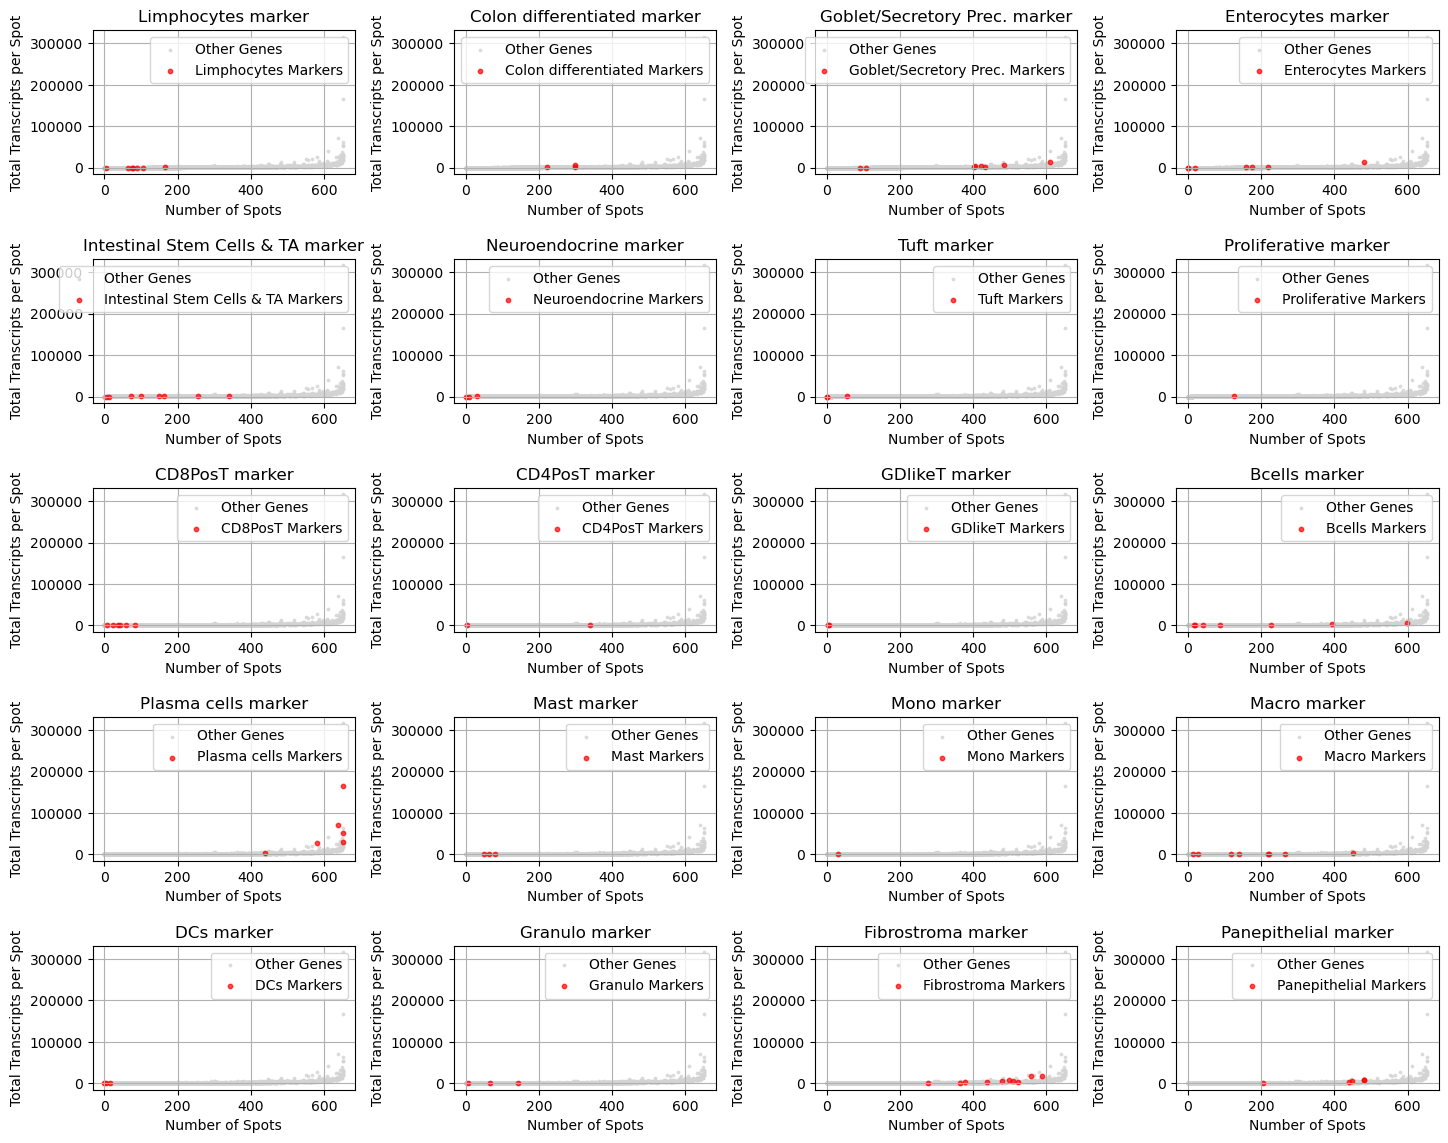

In [297]:
import matplotlib.pyplot as plt

total_counts_per_gene = f_spot_gene.sum(axis=1)

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.tight_layout(pad=4.0)

# Create masks and marker types (as previously shown)

# List of masks and corresponding marker types
masks = [limpho_mask, colon_diff_mask, goblet_sec_mask, entero_mask, isc_mask, neuroendocrine_mask, tuft_mask,
         proliferative_mask, cd8post_mask, cd4post_mask, gdlike_mask, bcells_mask, plasma_cells_mask, mast_mask,
         mono_mask, macro_mask, dcs_mask, granulo_mask, fibrostroma_mask, panepithelial_mask]

cell_types = ['Limphocytes','Colon differentiated', 'Goblet/Secretory Prec.', 'Enterocytes', 'Intestinal Stem Cells & TA', 'Neuroendocrine', 'Tuft', 'Proliferative', 'CD8PosT', 'CD4PosT', 'GDlikeT', 'Bcells', 'Plasma cells', 'Mast', 'Mono', 'Macro', 'DCs', 'Granulo', 'Fibrostroma', 'Panepithelial']

# Iterate over masks and corresponding colors
for i, (mask, cell) in enumerate(zip(masks, cell_types)):
    row = i // 4
    col = i % 4

    # Scatter plot for each marker type
    axes[row, col].scatter(samples_containing_gene[~mask], total_counts_per_gene[~mask], color='lightgrey', alpha=0.7, s=3, label='Other Genes')
    axes[row, col].scatter(samples_containing_gene[mask], total_counts_per_gene[mask], color='red', alpha=0.7, s=10, label=f'{cell} Markers')
    axes[row, col].set_xlabel('Number of Spots')
    axes[row, col].set_ylabel('Total Transcripts per Spot')
    axes[row, col].set_title(f'{cell} marker')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Show the plot
plt.show()

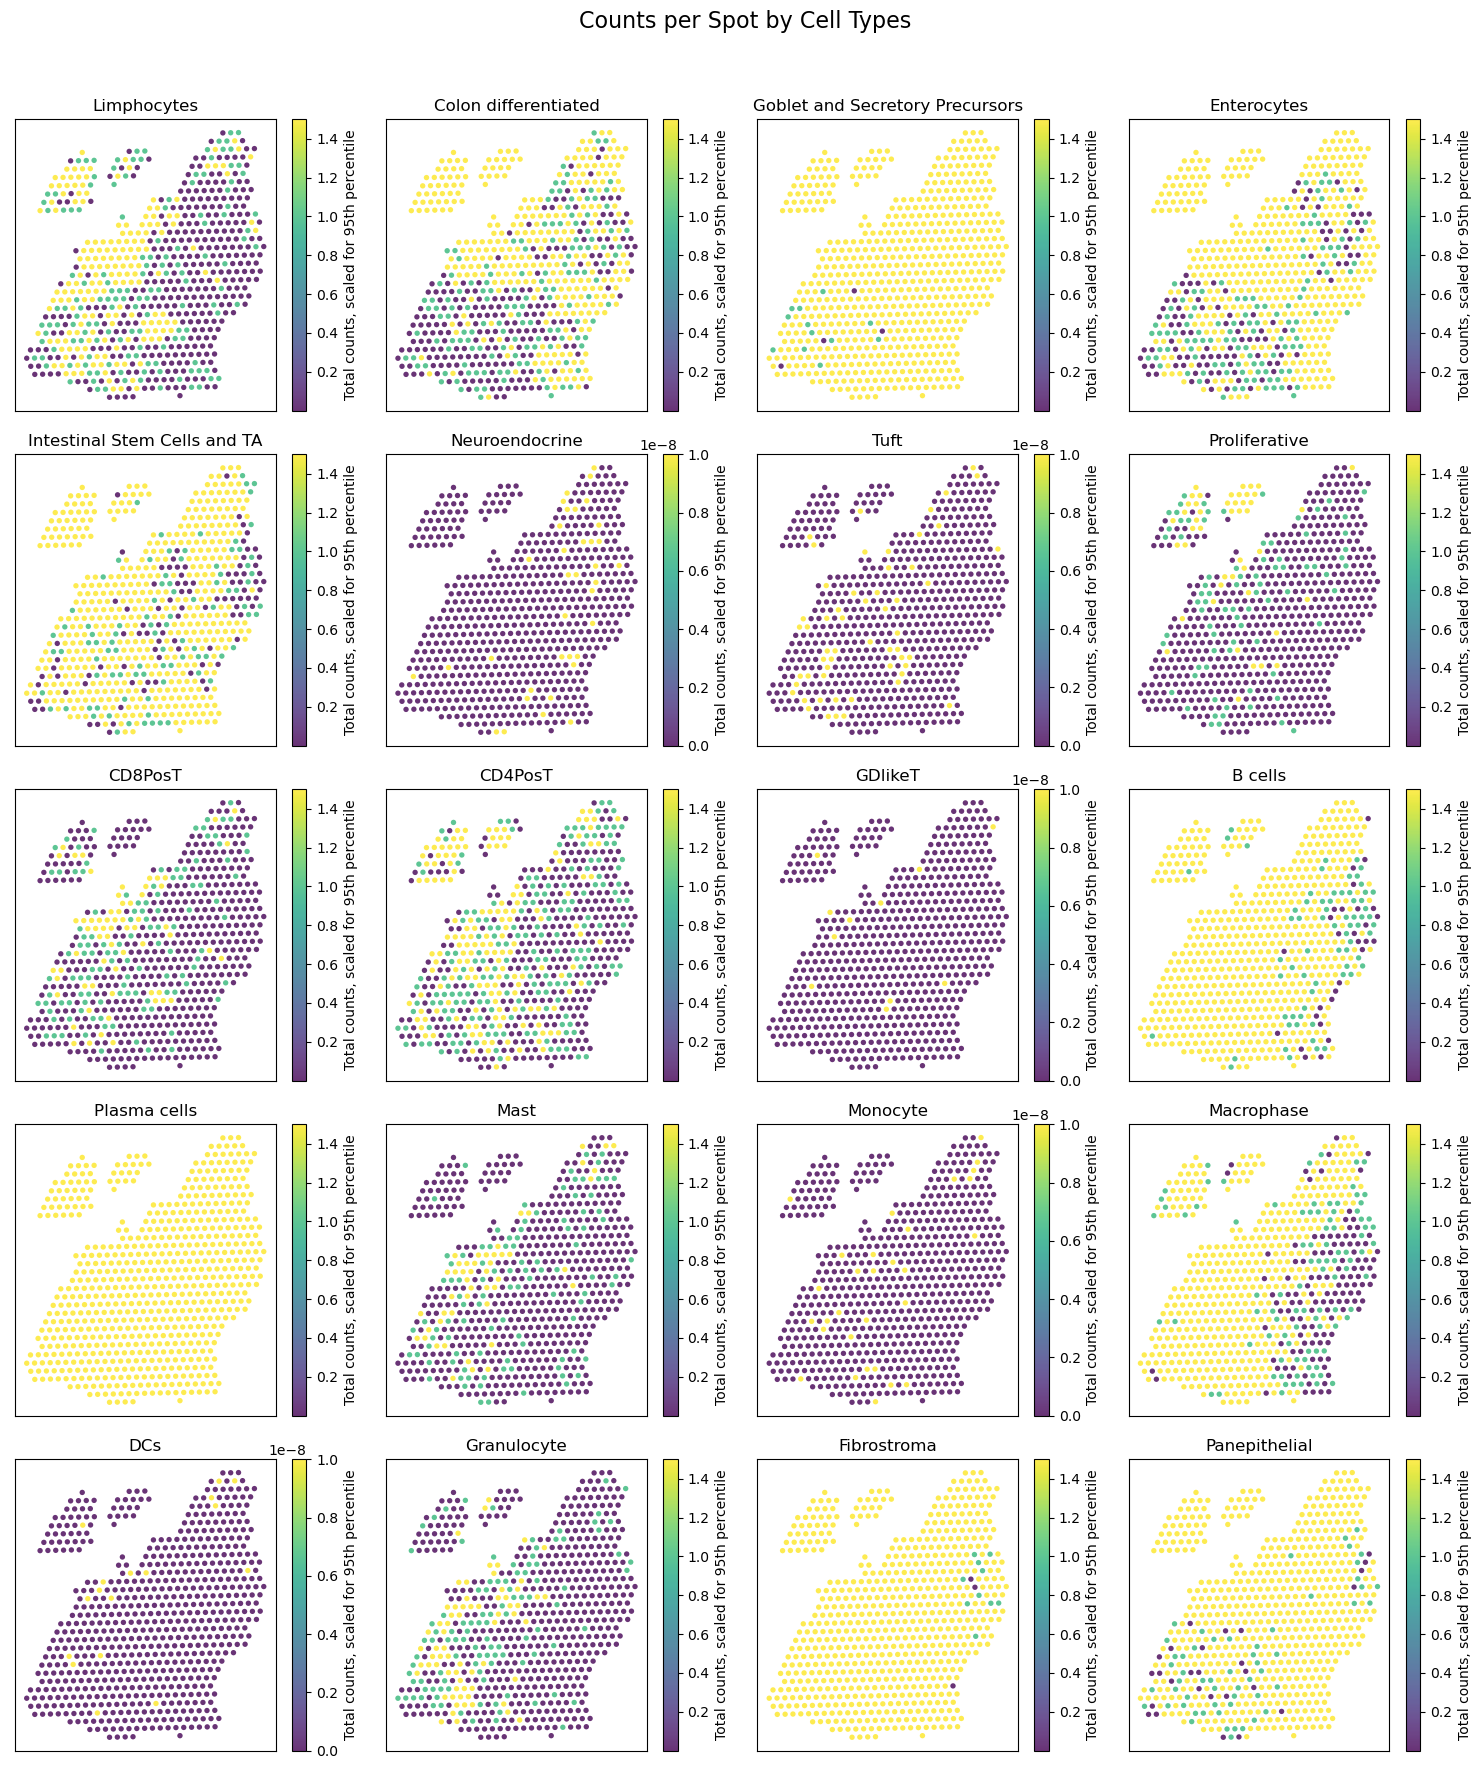

In [298]:
### Spatial heatmaps by cell types:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Define the cell types and corresponding subset names
cell_types = ['Limphocytes', 'Colon differentiated', 'Goblet and Secretory Precursors', 'Enterocytes', 'Intestinal Stem Cells and TA', 
              'Neuroendocrine', 'Tuft', 'Proliferative', 'CD8PosT', 'CD4PosT', 'GDlikeT', 'B cells', 'Plasma cells', 'Mast', 
              'Monocyte', 'Macrophase', 'DCs', 'Granulocyte', 'Fibrostroma', 'Panepithelial']

subset_names = ['limpho_subset', 'colon_diff_subset', 'goblet_sec_subset', 'entero_subset', 'isc_subset',
                'neuroendocrine_subset', 'tuft_subset', 'proliferative_subset', 'cd8post_subset', 'cd4post_subset',
                'gdlike_subset', 'bcells_subset', 'plasma_cells_subset', 'mast_subset', 'mono_subset', 'macro_subset',
                'dcs_subset', 'granulo_subset', 'fibrostroma_subset', 'panepithelial_subset']

# Create a 4x5 grid for the scatter plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 18))
fig.suptitle('Counts per Spot by Cell Types', fontsize=16)

# Flatten the 2D array of subplots for easier iteration
axes = axes.flatten()
minnn=0.00000001

# Iterate over each cell type and corresponding subset name, and create a scatter plot
for i, (cell_type, subset_name) in enumerate(zip(cell_types, subset_names)):
    # Get the subset corresponding to the current cell type
    cell_subset = eval(subset_name)
    
    # Calculate total counts per spot for the current cell type
    cell_counts_per_spot = np.sum(cell_subset, axis=0)

    mask_95 = cell_subset.to_numpy() < np.quantile(cell_subset.to_numpy(), 0.95)
    mask_95_max = mask_95.max()
    mask_95_max = mask_95_max + 0.5*(mask_95_max)
    
    # Create scatter plot
    sp= axes[i].scatter(w / 2, z, c=cell_counts_per_spot, cmap='viridis', alpha=0.8, s=15, edgecolors='none',vmax=mask_95_max,vmin=minnn)
    axes[i].set_title(f'{cell_type}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].invert_yaxis()
    fig.colorbar(sp, ax=axes[i],label='Total counts, scaled for 95th percentile')


# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Outliers

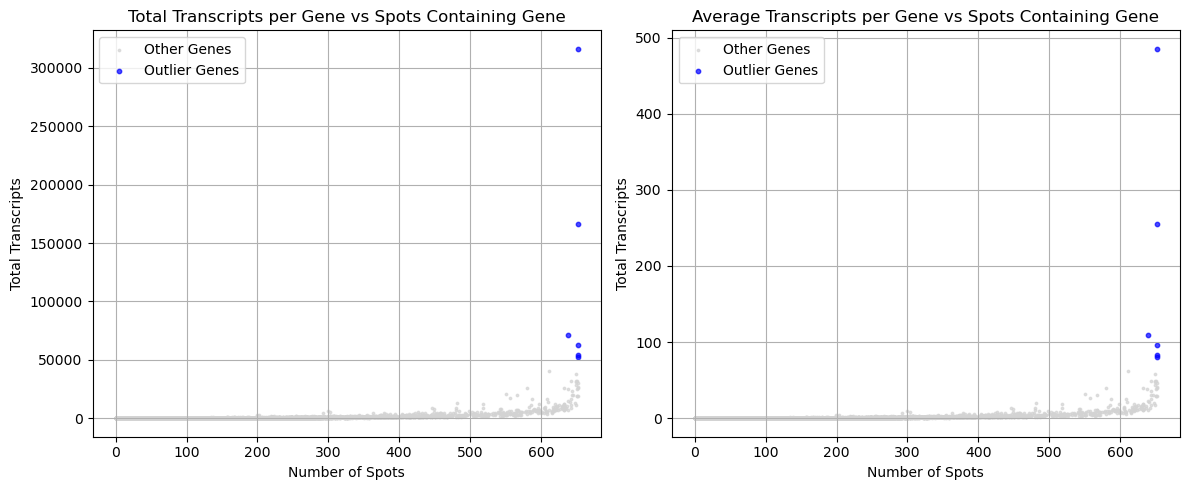

In [299]:
### plot outliers on scatterplot
import numpy as np
from scipy.stats import zscore

total_counts_per_gene = f_spot_gene.sum(axis=1)
samples_containing_gene = (f_spot_gene > 0).sum(axis=1)

# Calculate Z-scores for both variables
z_scores_samples = zscore(samples_containing_gene)
z_scores_counts = zscore(total_counts_per_gene)

# Set a threshold for identifying outliers (can adjust this threshold)
z_score_threshold = 20

# Identify outliers based on the threshold
outliers_mask = np.logical_or(np.abs(z_scores_samples) > z_score_threshold, np.abs(z_scores_counts) > z_score_threshold)

# Get the gene names corresponding to the outliers
outlier_gene_names = f_spot_gene.index[outliers_mask]
outlier_mask = f_spot_gene.index.isin(outlier_gene_names)

# Create subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for Total Transcripts
axes[0].scatter(samples_containing_gene[~outlier_mask], total_counts_per_gene[~outlier_mask], color='lightgrey', alpha=0.7, s=3, label='Other Genes')
axes[0].scatter(samples_containing_gene[outlier_mask], total_counts_per_gene[outlier_mask], color='blue', alpha=0.7, s=10, label='Outlier Genes')
axes[0].set_xlabel('Number of Spots')
axes[0].set_ylabel('Total Transcripts')
axes[0].set_title('Total Transcripts per Gene vs Spots Containing Gene')
axes[0].legend()
axes[0].grid(True)

# Scatter plot for Average Transcripts
axes[1].scatter(samples_containing_gene[~outlier_mask], av_counts_per_gene[~outlier_mask], color='lightgrey', alpha=0.7, s=3, label='Other Genes')
axes[1].scatter(samples_containing_gene[outlier_mask], av_counts_per_gene[outlier_mask], color='blue', alpha=0.7, s=10, label='Outlier Genes')
axes[1].set_xlabel('Number of Spots')
axes[1].set_ylabel('Total Transcripts')
axes[1].set_title('Average Transcripts per Gene vs Spots Containing Gene')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

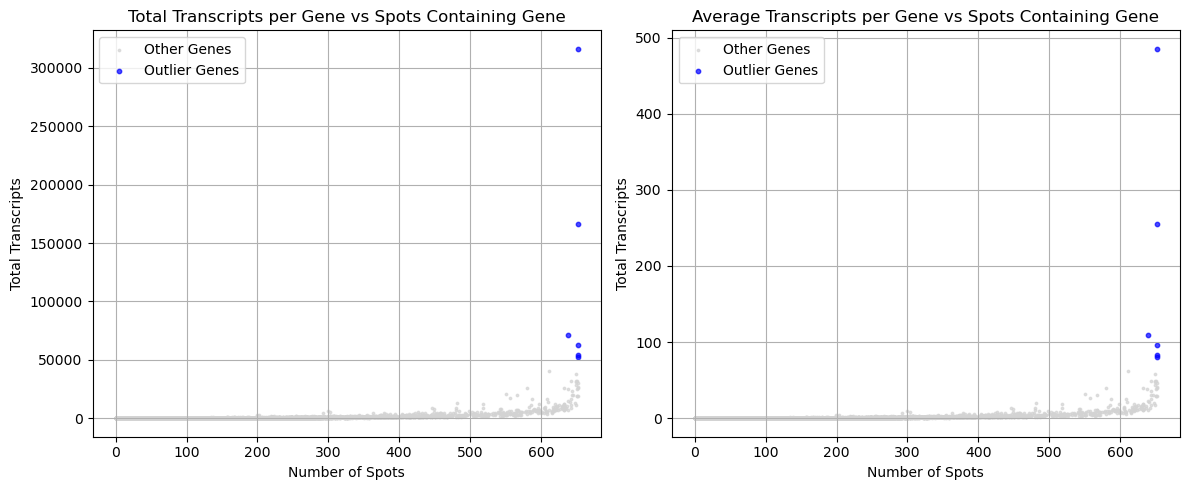

In [300]:
# Plot them for sanity check 
# Create subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for Total Transcripts
axes[0].scatter(samples_containing_gene[~outlier_mask], total_counts_per_gene[~outlier_mask], color='lightgrey', alpha=0.7, s=3, label='Other Genes')
axes[0].scatter(samples_containing_gene[outlier_mask], total_counts_per_gene[outlier_mask], color='blue', alpha=0.7, s=10, label='Outlier Genes')
axes[0].set_xlabel('Number of Spots')
axes[0].set_ylabel('Total Transcripts')
axes[0].set_title('Total Transcripts per Gene vs Spots Containing Gene')
axes[0].legend()
axes[0].grid(True)

# Scatter plot for Average Transcripts
axes[1].scatter(samples_containing_gene[~outlier_mask], av_counts_per_gene[~outlier_mask], color='lightgrey', alpha=0.7, s=3, label='Other Genes')
axes[1].scatter(samples_containing_gene[outlier_mask], av_counts_per_gene[outlier_mask], color='blue', alpha=0.7, s=10, label='Outlier Genes')
axes[1].set_xlabel('Number of Spots')
axes[1].set_ylabel('Total Transcripts')
axes[1].set_title('Average Transcripts per Gene vs Spots Containing Gene')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

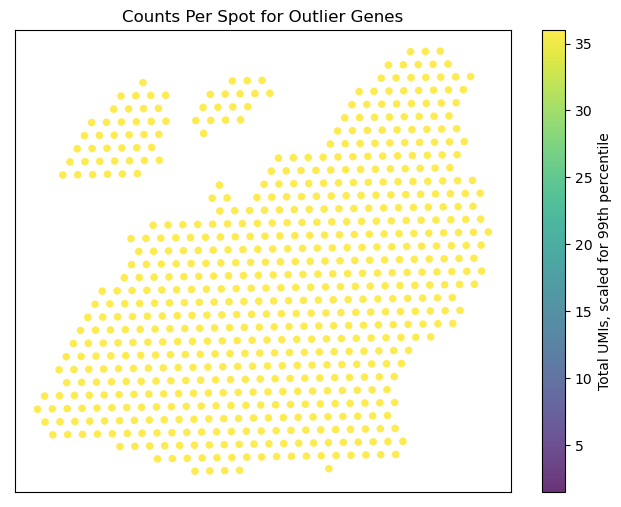

In [301]:
### plot outliers spatially
import math
outlier_df = f_spot_gene[f_spot_gene.index.isin(outlier_gene_names)]
outlier_counts_per_spot = np.sum(outlier_df, axis=0)

# color = np.emath.logn(1.8, outlier_counts_per_spot)
# color = [0 if c < 0 else c for c in color ]

#outlier_genes_per_spot = np.sum(f_matrix_array > 0, axis=0)

e=0.0000000000000001

out_95 = outlier_df.to_numpy() < np.quantile(outlier_df.to_numpy(), 0.99)
out_95_max = out_95.max()
out_95_max = out_95_max + 0.5*(out_95_max)

# Create hm with color scale determined by values: counts/spot, filt
plt.figure(figsize=(8, 6))
plt.scatter(w / 2, z, c= outlier_counts_per_spot, cmap='viridis', alpha=0.8, s =30, edgecolors='none',vmax=out_95_max)
plt.colorbar(label='Total UMIs, scaled for 99th percentile') # Add color bar with label
plt.title('Counts Per Spot for Outlier Genes')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
plt.show()